# Meeting 06 - Inductive Data Types

Bor-Yuh Evan Chang  
Thursday, September 12, 2024

<!-- 3 Expressions -->

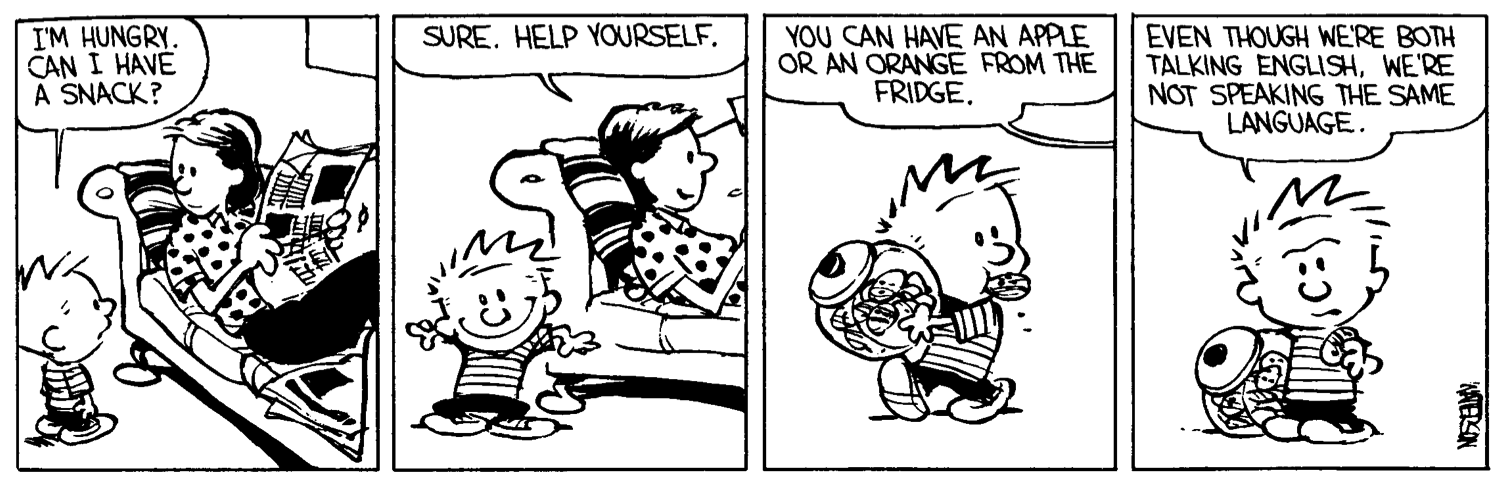

What questions does your neighbor have?

[ In-Class Slides](in-class/meeting06-inductive-data-types.pdf)<br/> [
In-Class Jupyter](in-class/meeting06-inductive-data-types.ipynb)<br/> [
Book
Chapter](https://csci3155.cs.colorado.edu/pppl-course/book/inductive-data-types.html)

## Announcements

-   Lab 1 due this Friday 9/13 6pm
    -   Use GitHub and VS Code: Submit `Lab1.scala`. Just read Jupyter
        notebook or use it for scratch work.
    -   No autograder on Gradescope. Submit via GitHub.
    -   Take advantage of lab section Friday to finish!

## Today

-   [Inductive Data
    Types](https://csci3155.cs.colorado.edu/pppl-course/book/inductive-data-types.html)
-   Triage Your Questions
    -   Lab 1?
-   Revisit and Go Deeper On:
    -   Recursion (Meeting 05)
    -   Data Types (Meeting 04), if time permits
    -   Binding and Scope (Meeting 03), if time permits

## Questions?

-   Review:
    -   What’s *tail recursion*? How does it relate loops?

## Questions?

## MyList

A list is an *inductive data type*:

In [2]:
object MyList {
  sealed trait List[A]
  case class Nil[A]() extends List[A]
  case class ::[A](head: A, tail: List[A]) extends List[A]
}

defined object MyList

## Recursion on Lists

In [3]:
def length[A](l: List[A]): Int = l match {
  case Nil => 0
  case ::(_, t) => 1 + length(t)
}
length( List(1, 2, 3) )

defined function length
res2_1: Int = 3

## Without Pattern Matching

In [4]:
def length[A](l: List[A]): Int =
  if (l == Nil) 0
  else 1 + length(l.tail)

def tail[A](l: List[A]): List[A] = l match {
  case Nil => ???
  case _ :: t => t
}

defined function length
defined function tail

Could `l.tail` fail?

## Append

In [12]:
def append[A](xl: List[A], yl: List[A]): List[A] = {
  println(s"append(xl = $xl, yl = $yl)")
  val r = xl match {
    case Nil => yl
    case ::((xh: A), (xt: List[A])) => xh :: append(xt, yl)
  }
  println(s"returning $r")
  r
}
append( List(1, 2, 3), List(4, 5, 6) )

append(xl = List(1, 2, 3), yl = List(4, 5, 6))
append(xl = List(2, 3), yl = List(4, 5, 6))
append(xl = List(3), yl = List(4, 5, 6))
append(xl = List(), yl = List(4, 5, 6))
returning List(4, 5, 6)
returning List(3, 4, 5, 6)
returning List(2, 3, 4, 5, 6)
returning List(1, 2, 3, 4, 5, 6)


defined function append
res11_1: List[Int] = List(1, 2, 3, 4, 5, 6)

Now, we see why `append` (and `:::` in the Scala library) has to be
linear time.

## Buggy Append

What does `buggyAppend` do?

In [13]:
def buggyAppend[A](xl: List[A], yl: List[A]): List[A] = xl match {
  case Nil => yl
  case xh :: xt => buggyAppend(xt, xh :: yl)
}
buggyAppend( List(1, 2, 3), List(4, 5, 6))

defined function buggyAppend
res12_1: List[Int] = List(3, 2, 1, 4, 5, 6)

## Reverse

In [15]:
def reverse[A](l: List[A]): List[A] = l match {
  case Nil => Nil
  case h :: t => append(reverse(t), h :: Nil)
}
reverse( List(1, 2, 3) )

append(xl = List(), yl = List(3))
returning List(3)
append(xl = List(3), yl = List(2))
append(xl = List(), yl = List(2))
returning List(2)
returning List(3, 2)
append(xl = List(3, 2), yl = List(1))
append(xl = List(2), yl = List(1))
append(xl = List(), yl = List(1))
returning List(1)
returning List(2, 1)
returning List(3, 2, 1)


defined function reverse
res14_1: List[Int] = List(3, 2, 1)

## Exercise: Tail-Recursive Reverse and is Linear Time!

In [26]:
def reverse[B,A](l: List[B]) = {
  def rev(l: List[B], acc: List[B]): List[B] = l match {
    case Nil => acc
    case h :: t => rev(t, h :: acc)
  }
  rev(l, Nil)
}
reverse( List(1, 2, 3) )

defined function reverse
res25_1: List[Int] = List(3, 2, 1)

## Trees

In [27]:
sealed trait BinaryTree
case object Empty extends BinaryTree
case class Node(l: BinaryTree, d: Int, r: BinaryTree) extends BinaryTree

def height(t: BinaryTree): Int = ???

val t = Node(Node(Empty, 2, Empty), 10, Node(Empty, 14, Node(Empty, 17, Empty)))
height(t)

: 

## Persistent Data Structures

In [18]:
val m = Map(2 -> List("two", "dos", "二"), 10 -> List("ten", "diez", "十"))
val newm = m + (14 -> List("fourteen", "catorce", "十四"))

m : Map [ Int , List [ String ]] = Map (
 2 -> List ( "two" , "dos" , "\u4e8c" ),
 10 -> List ( "ten" , "diez" , "\u5341" )
)
 newm : Map [ Int , List [ String ]] = Map (
 2 -> List ( "two" , "dos" , "\u4e8c" ),
 10 -> List ( "ten" , "diez" , "\u5341" ),
 14 -> List ( "fourteen" , "catorce" , "\u5341\u56db" )
)

## An Object Language

Since we want to study small sub-languages common to programming
languages in general, we don’t care much about concrete syntax.

Let’s consider JavaScripty to be the subset of JavaScript we want to
study at the moment, for example, number literals and `+`:

In [ ]:
3 + 7 + 4.2

Our goal is to implement semantics following JavaScript (for this small
JavaScripty).

## Parsing and Abstract Syntax

The process of converting a program in concrete syntax (i.e., as a
string) to a program in abstract syntax (i.e., as a tree) is called
*parsing*.

## Abstract Syntax Trees (ASTs)

In [28]:
sealed trait Expr
case class N(n: Double) extends Expr
case class Plus(e1: Expr, e2: Expr) extends Expr

val three = N(3)
val seven = N(7)
val four_point_two = N(4.2)
val three_plus_seven = Plus(three, seven)
val three_plus_seven_plus_four_point_two = Plus(three_plus_seven, four_point_two)

defined trait Expr
defined class N
defined class Plus
three: N = N(3.0)
seven: N = N(7.0)
four_point_two: N = N(4.2)
three_plus_seven: Plus = Plus(N(3.0), N(7.0))
three_plus_seven_plus_four_point_two: Plus = Plus(Plus(N(3.0), N(7.0)), N(4.2))

## Eval

$$
e \Downarrow v
$$

is an _interpreter_

In [38]:
def eval(e: Expr): Double = e match {
  case N(n) => n
  case Plus(e1, e2) => eval(e1) + eval(e2)
}
eval(three)
eval(three_plus_seven_plus_four_point_two)

defined function eval
res37_1: Double = 3.0
res37_2: Double = 14.2